<a href="https://colab.research.google.com/github/MarasaniJhansi/Alzheimer-s-Disease-Classification-using-InceptionV3/blob/main/Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Non_Demented/non_1395.jpg  
  inflating: Dataset/Non_Demented/non_1396.jpg  
  inflating: Dataset/Non_Demented/non_1397.jpg  
  inflating: Dataset/Non_Demented/non_1398.jpg  
  inflating: Dataset/Non_Demented/non_1399.jpg  
  inflating: Dataset/Non_Demented/non_14.jpg  
  inflating: Dataset/Non_Demented/non_140.jpg  
  inflating: Dataset/Non_Demented/non_1400.jpg  
  inflating: Dataset/Non_Demented/non_1401.jpg  
  inflating: Dataset/Non_Demented/non_1402.jpg  
  inflating: Dataset/Non_Demented/non_1403.jpg  
  inflating: Dataset/Non_Demented/non_1404.jpg  
  inflating: Dataset/Non_Demented/non_1405.jpg  
  inflating: Dataset/Non_Demented/non_1406.jpg  
  inflating: Dataset/Non_Demented/non_1407.jpg  
  inflating: Dataset/Non_Demented/non_1408.jpg  
  inflating: Dataset/Non_Demented/non_1409.jpg  
  inflating: Dataset/Non_Demented/non_141.jpg  
  inflating: Dataset/Non_Demented/non_1410.jpg  
  inflating: Dataset/N

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

data_dir = '/content/Dataset'
images = []
labels = []

for subfolder in tqdm(os.listdir(data_dir)):
    subfolder_path = os.path.join(data_dir, subfolder)
    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        labels.append(subfolder)

df = pd.DataFrame({'image': images, 'label': labels})

100%|██████████| 4/4 [00:00<00:00, 329.97it/s]


In [ ]:
df.head()

,image,label
0,/content/Dataset/Moderate_Demented/moderate_6.jpg,Moderate_Demented
1,/content/Dataset/Moderate_Demented/moderate_27...,Moderate_Demented
2,/content/Dataset/Moderate_Demented/moderate_62...,Moderate_Demented
3,/content/Dataset/Moderate_Demented/moderate_13...,Moderate_Demented
4,/content/Dataset/Moderate_Demented/moderate_47...,Moderate_Demented


In [ ]:
df.tail()

,image,label
6395,/content/Dataset/Non_Demented/non_2084.jpg,Non_Demented
6396,/content/Dataset/Non_Demented/non_768.jpg,Non_Demented
6397,/content/Dataset/Non_Demented/non_1711.jpg,Non_Demented
6398,/content/Dataset/Non_Demented/non_2086.jpg,Non_Demented
6399,/content/Dataset/Non_Demented/non_228.jpg,Non_Demented


In [ ]:
unique_labels = df['label'].unique()
print(unique_labels)

['Moderate_Demented' 'Mild_Demented' 'Very_Mild_Demented' 'Non_Demented']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   6400 non-null   object
 1   label   6400 non-null   object
dtypes: object(2)
memory usage: 100.1+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

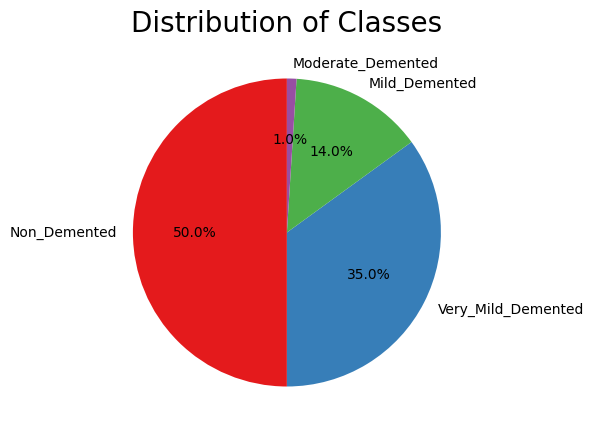

In [ ]:
plt.figure(figsize=(5, 5))
class_counts = df['label'].value_counts()
labels = class_counts.index
sizes = class_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'))
plt.title('Distribution of Classes', fontsize=20)
plt.show()

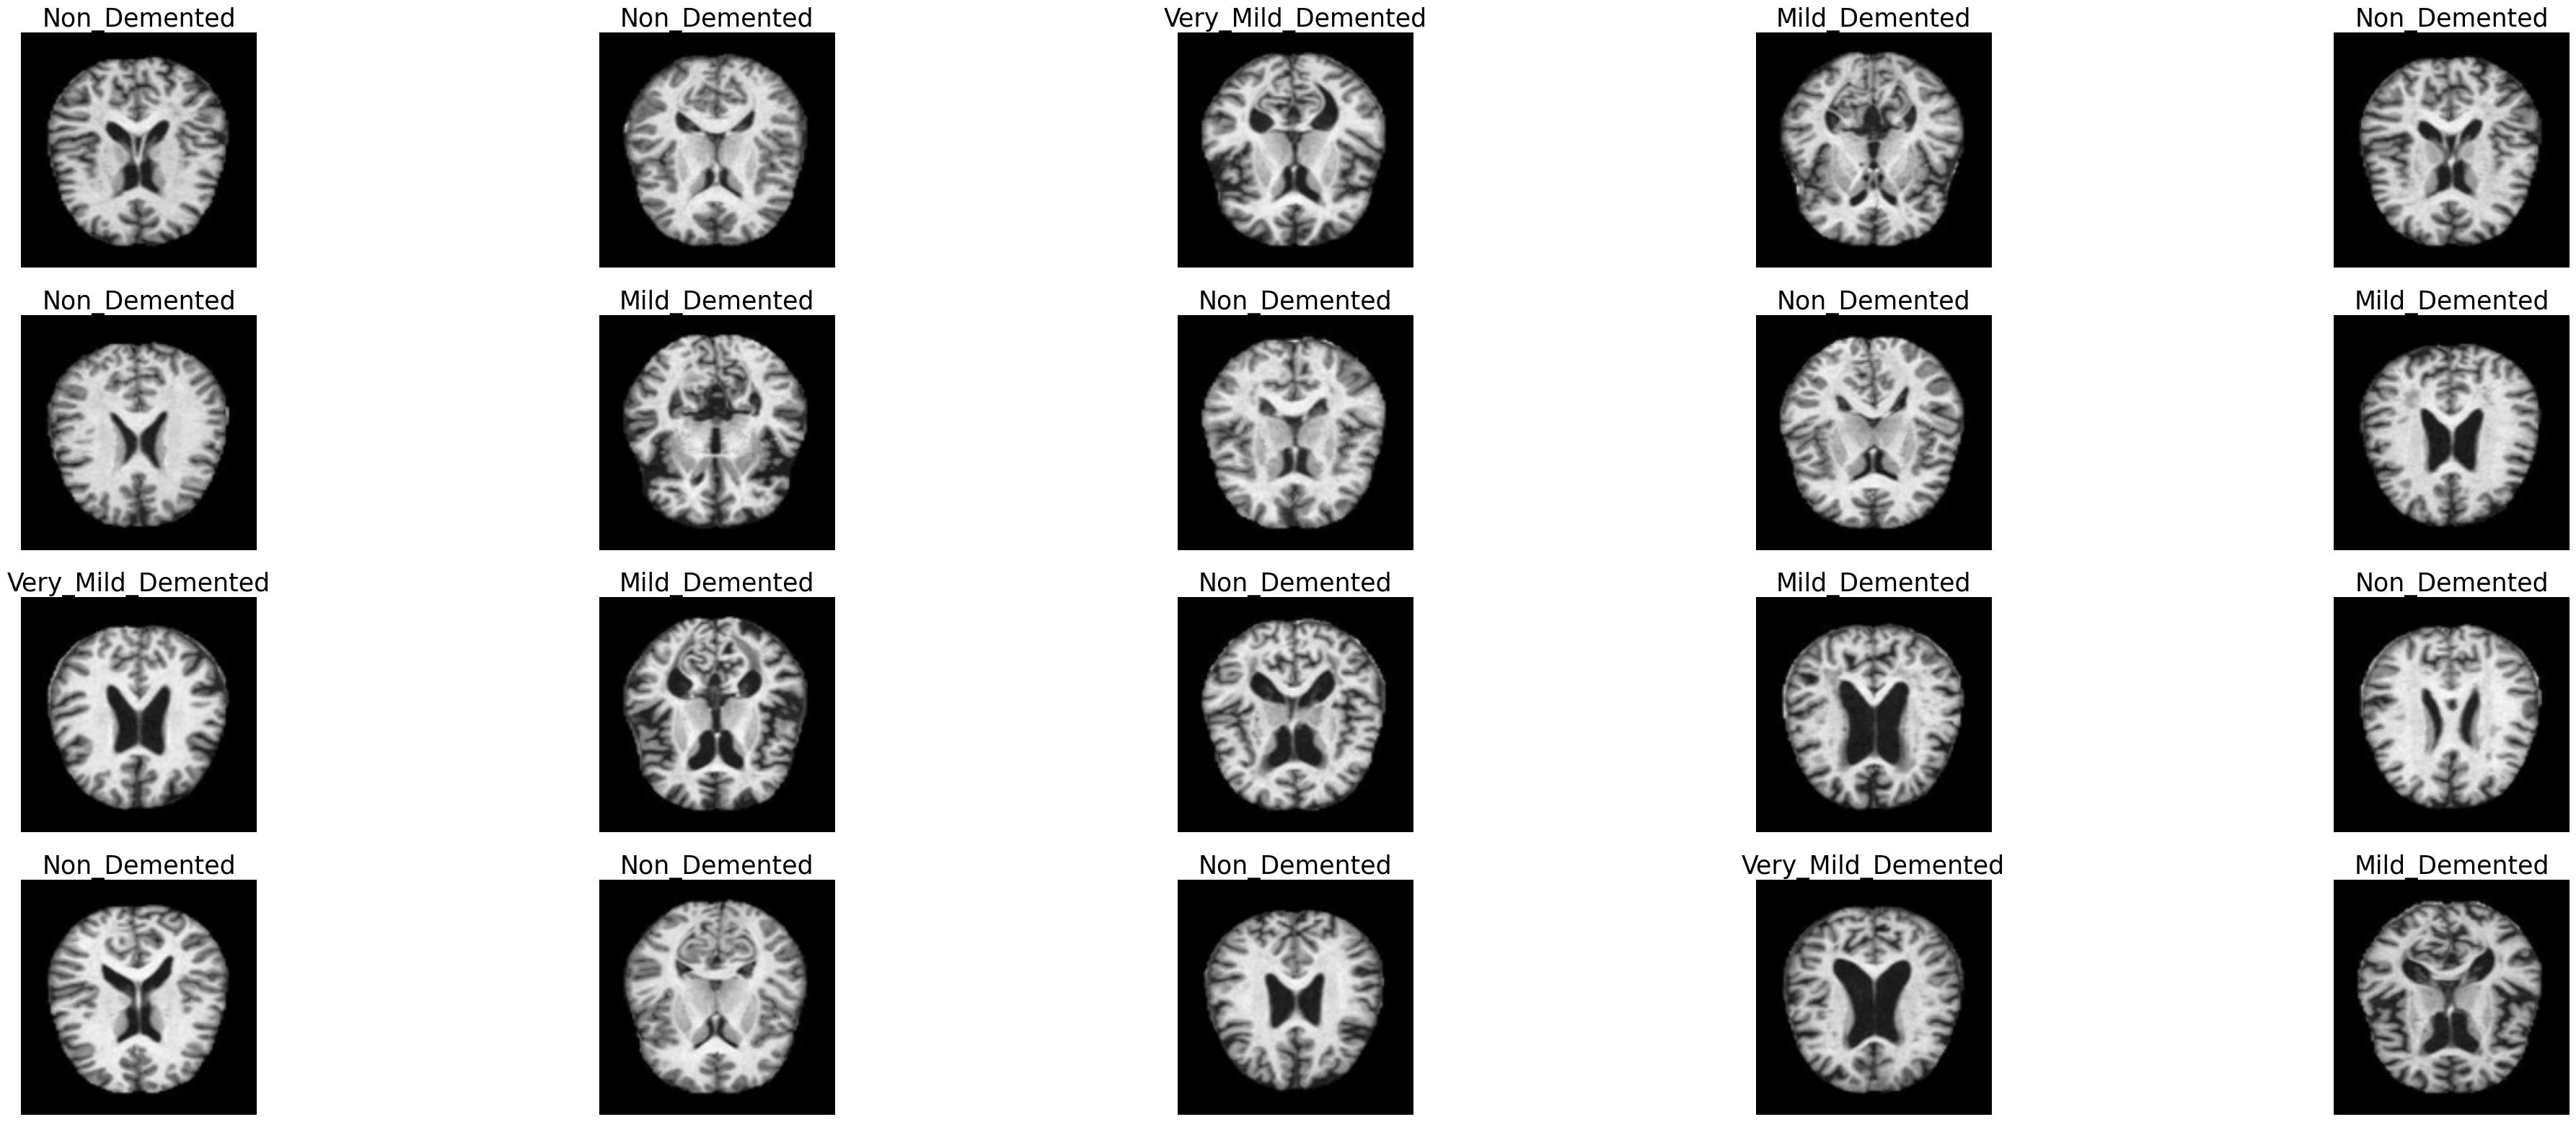

In [ ]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),20)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)

In [ ]:
Size=(128,128)
work_dr = ImageDataGenerator(
    rescale = 1./255
)
train_data_gen = work_dr.flow_from_dataframe(
    df,
    x_col='image',
    y_col='label',
    target_size=Size,
    batch_size=6400,
    shuffle=False
)

Found 6400 validated image filenames belonging to 4 classes.


In [ ]:
train_data, train_labels = train_data_gen.next()

In [ ]:
class_num=np.sort(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'])
class_num

array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype='<U16')

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, 128 * 128 * 3), train_labels)
train_data = train_data.reshape(-1, 128,128, 3)
print(train_data.shape, train_labels.shape)

(12800, 128, 128, 3) (12800, 4)


<ipython-input-18-1192eb70aed1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=labels,palette='Set1')


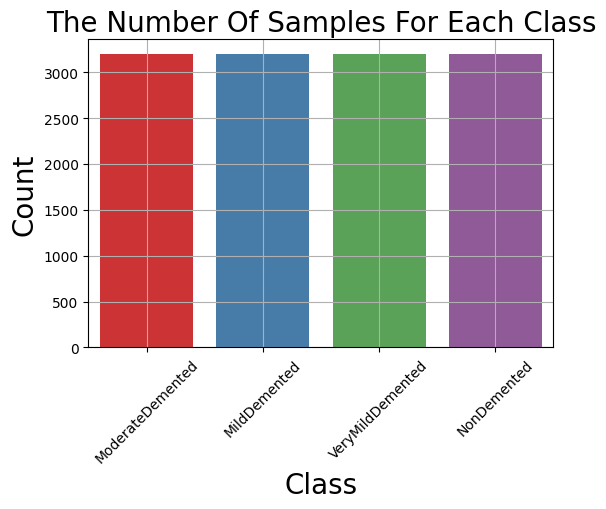

In [ ]:
labels=[class_num[i] for i in np.argmax(train_labels,axis=1) ]
plt.figure(figsize=(6,4))
ax = sns.countplot(x=labels,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train, X_test1, y_train, y_test1 = train_test_split(train_data,train_labels, test_size=0.3, random_state=42,shuffle=True,stratify=train_labels)
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('X_val shape is ' , X_val.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)
print('y_val shape is ' , y_val.shape)

X_train shape is  (8960, 128, 128, 3)
X_test shape is  (1920, 128, 128, 3)
X_val shape is  (1920, 128, 128, 3)
y_train shape is  (8960, 4)
y_test shape is  (1920, 4)
y_val shape is  (1920, 4)


In [ ]:
#InceptionV3
base_model = tf.keras.applications.InceptionV3(input_shape=(128,128,3),include_top=False,weights='imagenet')
base_model.trainable = False
model_Inception=keras.models.Sequential()
model_Inception.add(base_model)
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.GlobalAveragePooling2D())
model_Inception.add(keras.layers.Flatten())
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dense(512,activation=tf.nn.relu))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.Dense(256,activation=tf.nn.relu))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.Dense(128,activation=tf.nn.relu))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.Dense(64,activation=tf.nn.relu))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dense(4, activation=tf.nn.softmax))
model_Inception.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 2, 2, 2048)        0         
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                         

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback to save the best model to Google Drive
checkpoint_path = '/content/best_model.keras'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

In [ ]:

model_Inception.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model_Inception.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint])


Epoch 1/50
279/280 [============================>.] - ETA: 0s - loss: 1.3536 - accuracy: 0.4273
Epoch 1: val_accuracy improved from -inf to 0.62865, saving model to /content/best_model.keras
280/280 [==============================] - 25s 47ms/step - loss: 1.3523 - accuracy: 0.4278 - val_loss: 0.7761 - val_accuracy: 0.6286
Epoch 2/50
279/280 [============================>.] - ETA: 0s - loss: 0.9210 - accuracy: 0.5643
Epoch 2: val_accuracy improved from 0.62865 to 0.66354, saving model to /content/best_model.keras
280/280 [==============================] - 10s 37ms/step - loss: 0.9210 - accuracy: 0.5642 - val_loss: 0.7019 - val_accuracy: 0.6635
Epoch 3/50
279/280 [============================>.] - ETA: 0s - loss: 0.8086 - accuracy: 0.6163
Epoch 3: val_accuracy improved from 0.66354 to 0.69844, saving model to /content/best_model.keras
280/280 [==============================] - 10s 37ms/step - loss: 0.8082 - accuracy: 0.6165 - val_loss: 0.6537 - val_accuracy: 0.6984
Epoch 4/50
279/280 [==

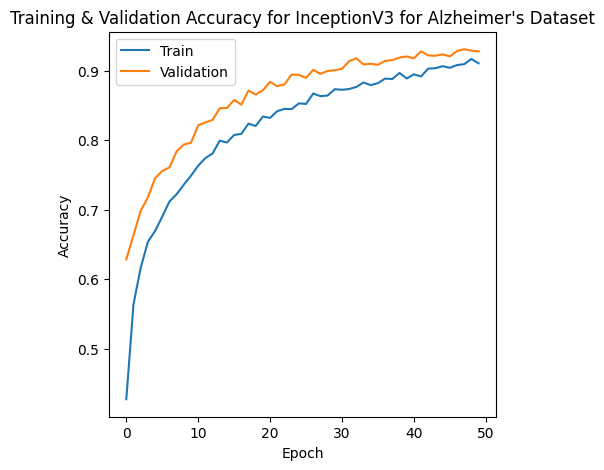

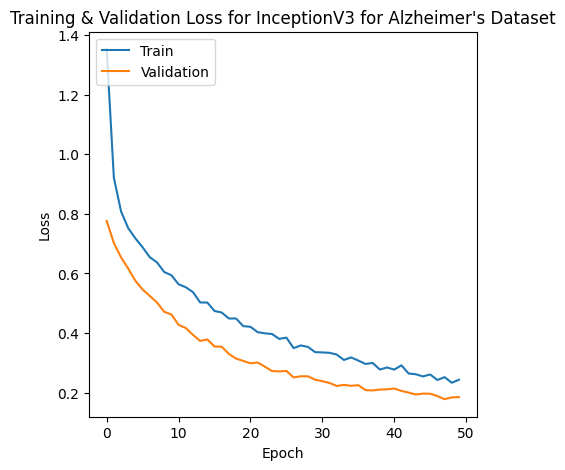

In [ ]:
from matplotlib import pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(5, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Training & Validation Accuracy for InceptionV3 for Alzheimer's Dataset")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_3DYoga90.png')
plt.show()
# Plot training & validation loss values
plt.figure(figsize=(5, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Training & Validation Loss for InceptionV3 for Alzheimer's Dataset")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_3DYoga90.png')

plt.show()


In [ ]:
score, acc= model_Inception.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

60/60 [==============================] - 2s 26ms/step - loss: 0.1893 - accuracy: 0.9234
Test Loss = 0.18926438689231873
Test Accuracy = 0.9234374761581421


In [ ]:
score, acc= model_Inception.evaluate(X_val,y_val)
print('val Loss =', score)
print('val Accuracy =', acc)

60/60 [==============================] - 2s 26ms/step - loss: 0.1849 - accuracy: 0.9276
val Loss = 0.18490669131278992
val Accuracy = 0.9276041388511658


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


# Assuming model_Inception.predict() gives you the predicted labels for X_test
y_pred = model_Inception.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print('Confusion Matrix:')
print(conf_matrix)

60/60 [==============================] - 3s 25ms/step
Confusion Matrix:
[[475   0   1   4]
 [  0 480   0   0]
 [ 11   0 401  68]
 [ 24   0  39 417]]


In [ ]:
from sklearn.metrics import classification_report

# Assuming model_Inception.predict() gives you the predicted labels for X_test
y_pred = model_Inception.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_num)

print('Classification Report:')
print(class_report)


60/60 [==============================] - 1s 25ms/step
Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.93      0.99      0.96       480
ModerateDemented       1.00      1.00      1.00       480
     NonDemented       0.91      0.84      0.87       480
VeryMildDemented       0.85      0.87      0.86       480

        accuracy                           0.92      1920
       macro avg       0.92      0.92      0.92      1920
    weighted avg       0.92      0.92      0.92      1920

